## Importing Eseential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading Data From CSv File

In [4]:
data = pd.read_csv("Blinkit Grocery Data.csv")
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Shape Of The Data

In [6]:
data.shape

(8523, 12)

## Data Type And Null Values In data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Wrong values in data

In [10]:
data["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

## Handeling wrong values

In [12]:
data["Item Fat Content"] = data["Item Fat Content"].replace({"LF" : "Low Fat", "low fat" : "Low Fat", "reg" : "Regular"})

In [13]:
data["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

##  **Business Requirements**

##  KPI Requirements

In [16]:
#Total Sales
Total_Sales = data["Sales"].sum().round(2)

#Average Sales
Average_Sales = data["Sales"].mean().round(2)

#NO. od items Sold
No_of_item_sold = data["Item Type"].count()

#Average Ratings
Average_ratings = data["Rating"].mean().round(1)

print("Total Sales : ", Total_Sales)
print("Average Sales : ",  Average_Sales)
print("Number of Item Sold : ", No_of_item_sold)
print("Average Rating : ", Average_ratings)

Total Sales :  1201681.49
Average Sales :  140.99
Number of Item Sold :  8523
Average Rating :  4.0


## **Charts Requirements**

## Total Sales By Fat Content

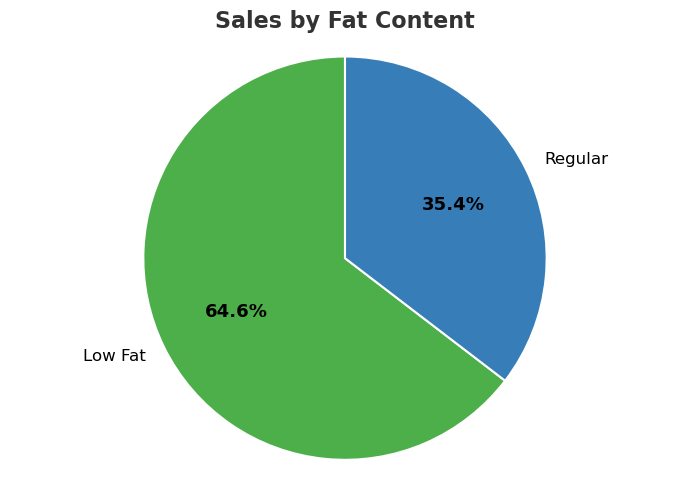

In [19]:
Sales_By_Fat = data.groupby("Item Fat Content")["Sales"].sum().round(2)
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']  # Edit based on number of fat categories
fig, ax = plt.subplots(figsize=(7, 5), facecolor='white')
wedges, texts, autotexts = ax.pie(
    Sales_By_Fat,
    labels=Sales_By_Fat.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    textprops=dict(color="black", fontsize=12))

plt.setp(autotexts, size=13, weight="bold")
ax.set_title("Sales by Fat Content", fontsize=16, fontweight='bold', color='#333333')
ax.axis("equal")
plt.tight_layout()
plt.show()

## Total Sales by Item Types

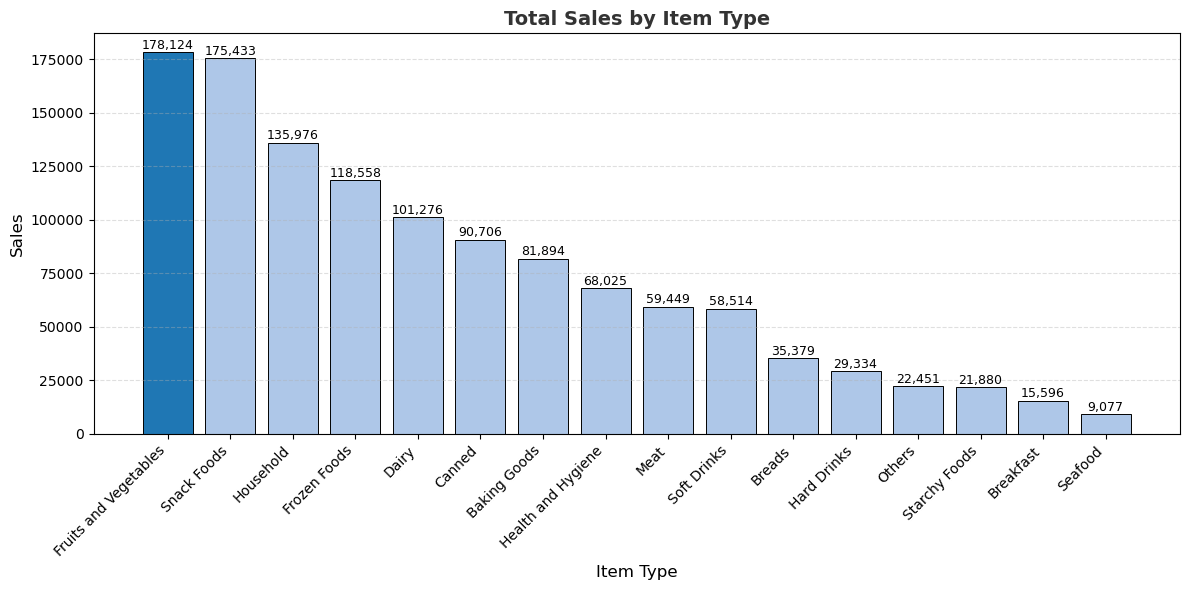

In [21]:
Sales_By_Item_type = data.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
colors = ['#1f77b4' if val == Sales_By_Item_type.max() else '#aec7e8' for val in Sales_By_Item_type]
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
bars = ax.bar(Sales_By_Item_type.index, Sales_By_Item_type.values, color=colors, edgecolor='black', linewidth=0.7)
for bar in bars:
    height = bar.get_height()
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, height + 100, f'{int(height):,}', ha='center', va='bottom', fontsize=9)
ax.set_xticklabels(Sales_By_Item_type.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel("Sales", fontsize=12)
ax.set_xlabel("Item Type", fontsize=12)
ax.set_title("Total Sales by Item Type", fontsize=14, fontweight='bold', color='#333333')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Fat Content By Outlet For Total Sales

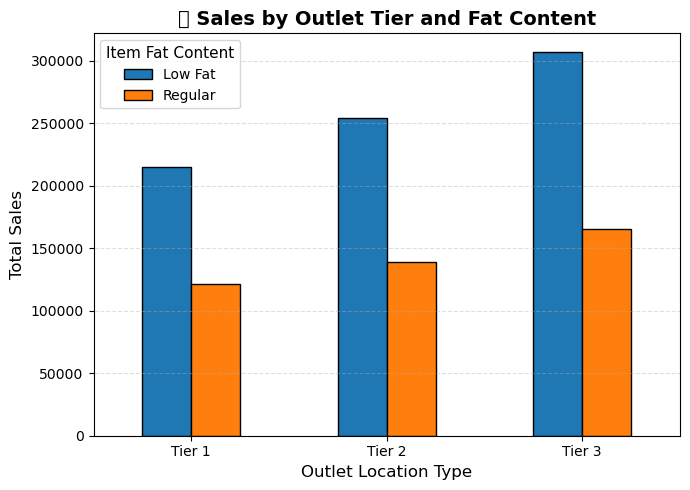

In [23]:
group = data.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
ax = group.plot(kind="bar", figsize=(7, 5), edgecolor='black')
ax.set_title("🏬 Sales by Outlet Tier and Fat Content", fontsize=14, weight='bold')
ax.set_xlabel("Outlet Location Type", fontsize=12)
ax.set_ylabel("Total Sales", fontsize=12)
ax.legend(title="Item Fat Content", fontsize=10, title_fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Total Sales By Outlet Establishment

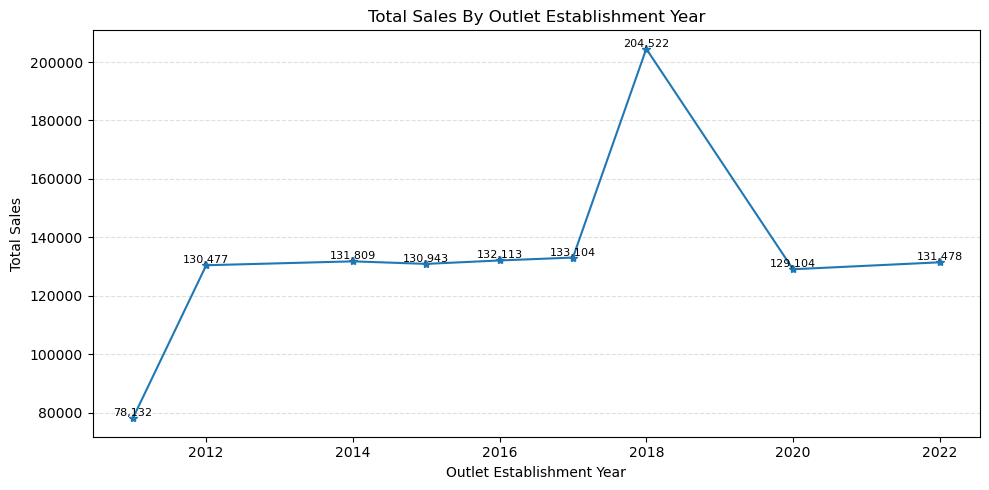

In [58]:
sales_by_year = data.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
plt.figure(figsize = (10, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = "*", linestyle = "-")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Total Sales By Outlet Establishment Year")
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f"{y:,.0f}", ha = "center", va = "bottom", fontsize = 8)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Sales By Oulet Size 

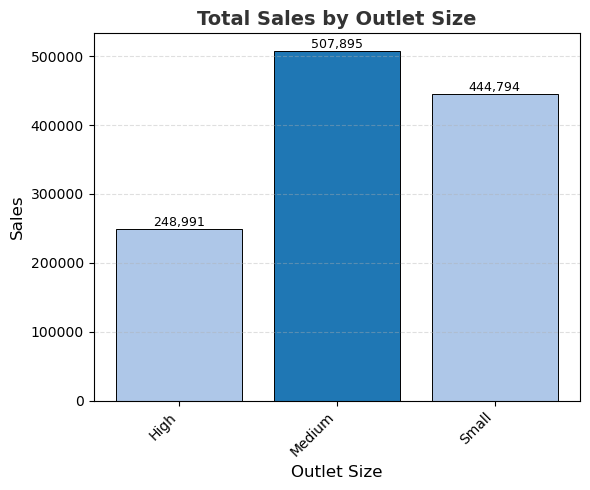

In [79]:
Sales_By_Outlet_size = data.groupby("Outlet Size")["Sales"].sum()
colors = ['#1f77b4' if val == Sales_By_Outlet_size.max() else '#aec7e8' for val in Sales_By_Outlet_size]
fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')
bars = ax.bar(Sales_By_Outlet_size.index, Sales_By_Outlet_size.values, color=colors, edgecolor='black', linewidth=0.7)
for bar in bars:
    height = bar.get_height()
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, height + 100, f'{int(height):,}', ha='center', va='bottom', fontsize=9)
ax.set_xticklabels(Sales_By_Outlet_size.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel("Sales", fontsize=12)
ax.set_xlabel("Outlet Size", fontsize=12)
ax.set_title("Total Sales by Outlet Size", fontsize=14, fontweight='bold', color='#333333')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()